In [1]:
import  matplotlib.pyplot as plt
import  numpy as np
import  scipy
from    scipy.optimize import curve_fit

from    scipy.stats import ks_2samp


Template dimensions: (487, 2)


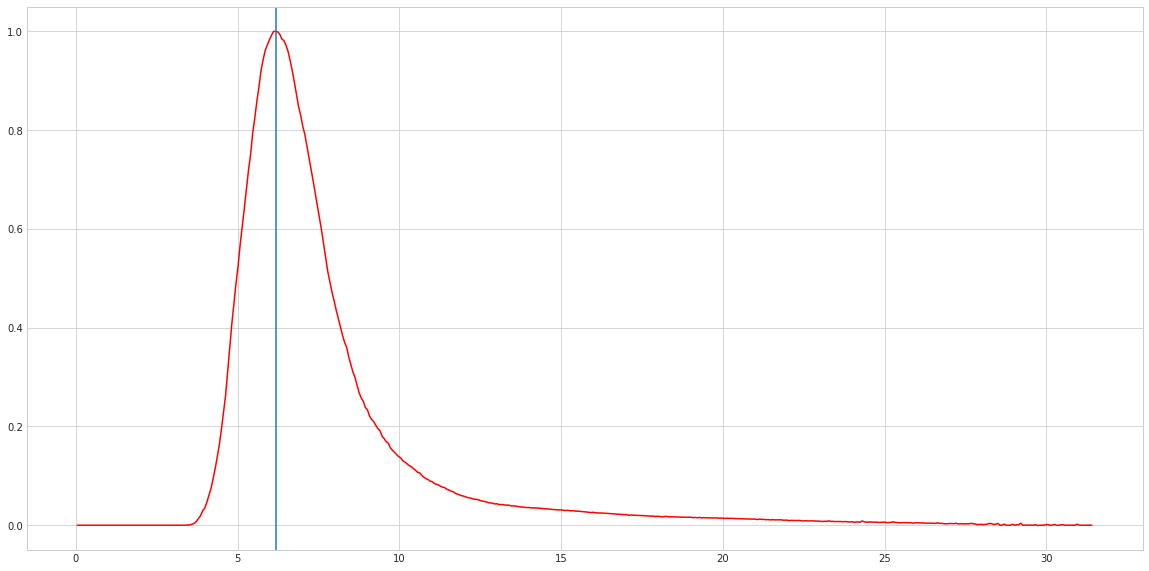

In [38]:
from numpy import loadtxt

# Max at 6.17742

template = loadtxt('template.csv', delimiter=',')
print(f'''Template dimensions: {template.shape}''')

# for entry in template: print(entry) print(template[:,0]) print(template[:,1])

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (20,10)

_ = plt.plot(template[:,0], template[:,1], '-r')
plt.axvline(x=6.17742)

Read an array: (10698, 36)


/tmp/ipykernel_22720/2247100489.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  _ = myTuple[1].hist2d(r2, buzz, bins=(100,100), range=((0.98, 1.0), (0, 40)), norm=colors.LogNorm(1.0), cmap='plasma')


Text(0, 0.5, 'Buzz')

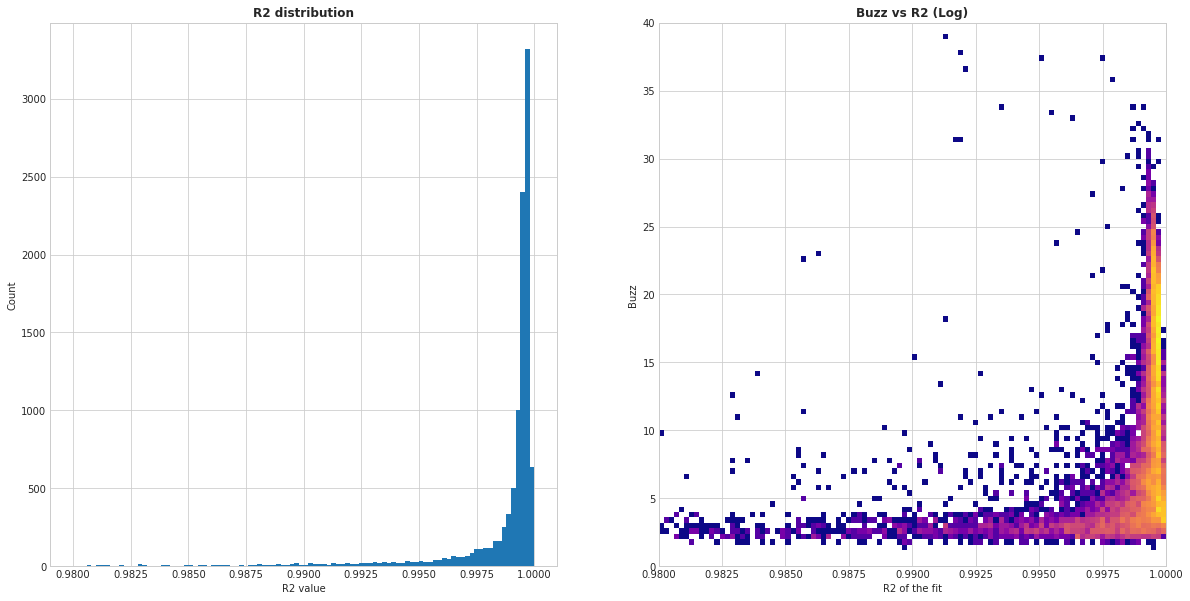

In [33]:
import numpy as np
from    matplotlib import colors

with open('./data/8gev_2099_27.npy', 'rb') as f: X = np.load(f)
print(f'''Read an array: {X.shape}''')

cnt=0
x  = np.linspace(0, 31, 31, endpoint=False)
x1 = np.linspace(0, 31, 310, endpoint=False)
# print(x)

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (20,10)

myTuple = ((None, None), (None, None))

fig, myTuple = plt.subplots(1,2)

buzz    = wave=X[:,34]
r2      = wave=X[:,35]

_ = myTuple[0].hist(r2, bins=100, range=(0.98, 1.0))
myTuple[0].set_title('R2 distribution', fontweight='bold')
myTuple[0].set_xlabel('R2 value')
myTuple[0].set_ylabel('Count')

_ = myTuple[1].hist2d(r2, buzz, bins=(100,100), range=((0.98, 1.0), (0, 40)), norm=colors.LogNorm(1.0), cmap='plasma')

myTuple[1].grid(True)

myTuple[1].set_title('Buzz vs R2 (Log)', fontweight='bold')

myTuple[1].set_xlabel('R2 of the fit')
myTuple[1].set_ylabel('Buzz')


In [ ]:
import  numpy as np
from    matplotlib import colors

with open('test.npy', 'rb') as f: X = np.load(f)
print(f'''Read an array: {X.shape}''')

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (20,10)

myTuple = ((None, None), (None, None))

fig, myTuple = plt.subplots(1,2)

a_real    = X[:,31]
a_infr    = X[:,34]

_ = myTuple[0].hist(a_infr - a_real, bins=100, range=(-100.0, 100.0))
myTuple[0].set_title('Inference residuals', fontweight='bold')
myTuple[0].set_xlabel('ADC ch.')


_ = myTuple[1].hist2d(a_real, a_infr - a_real, bins=(100,100), range=((0.0, 5000.0), (-50.0, 50)), norm=colors.LogNorm(1.0), cmap='plasma')
myTuple[0].set_title('Inference residuals', fontweight='bold')
myTuple[0].set_xlabel('Amplitude')
myTuple[0].set_ylabel('Residual')
myTuple[0].xaxis.set_zorder(10.0)
myTuple[0].yaxis.set_zorder(10.0)

myTuple[1].set_title('Inference residuals vs amplitude', fontweight='bold')
myTuple[1].xaxis.set_zorder(10.0)
myTuple[1].yaxis.set_zorder(10.0)
myTuple[1].grid(True)

In [76]:
t_offset = 6.17742

def tempfit(x, *par):
    return par[0]*np.interp((x - par[1] + t_offset), template[:,0], template[:,1]) + par[2]
    


Read an array: (13164, 34)
1.867838059481106 70.01732580316276


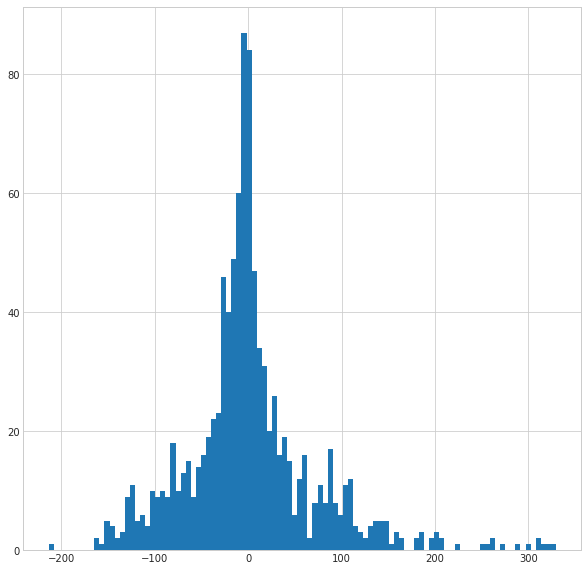

In [95]:
import numpy as np
from    matplotlib import colors

np.set_printoptions(precision=3, linewidth=80)

with open('./data/8gev_2099_27.npy', 'rb') as f: X = np.load(f)
print(f'''Read an array: {X.shape}''')

cnt_bad         = 0
param_bounds=([20.0, 2.0, 1200.0],[12000.0, 28.0, 2200.0])
indices = range(3, 31, 3)

x       = np.linspace(0, 31, 31, endpoint=False)
x_short = np.arange(3, 31, 3)

# print(np.array(x))
# print(np.array(x_short))


# 3 values: amplitude, time, pedestal

first = True

for i in range(1000): # loop over the data sample
    wave        = X[i][0:31]
    wave_short  = np.take(wave, indices)

    maxindex    =   np.argmax(wave)
    maxval      =   wave[maxindex]

    maxindex_short = np.argmax(wave_short)
    maxval_short   = wave_short[maxindex_short]

    maxindex_short = x[maxindex]
#    print(maxindex, maxval, maxindex_short, maxval_short)

    try:
        popt, _         = scipy.optimize.curve_fit(tempfit, x,          wave,        p0=[float(maxval-1580),         float(maxindex),       1580.0],        bounds = param_bounds)
        popt_short, _   = scipy.optimize.curve_fit(tempfit, x_short,    wave_short,  p0=[float(maxval_short-1580),   float(maxindex_short), 1580.0],        bounds = param_bounds)
    except:
        cnt_bad+=1
        continue

    if first:
        output_array = np.array([popt-popt_short])
        first = False
    else:
        output_array = np.append(output_array,[popt-popt_short], axis=0)

#print(output_array)
#print(output_array[:,1])

# _ = plt.plot(template[:,0], template[:,1], '-r')
plt.rcParams["figure.figsize"] = (10,10)
_ = plt.hist(output_array[:,0], bins=100)

print(np.average(output_array[:,0]), np.std(output_array[:,0]))

#plt.xaxis.set_zorder(10.0)
#plt.yaxis.set_zorder(10.0)
#    fit  = tempfit(x, *popt)


In [ ]:



# Kept for reference
# myTuple[1].xaxis.set_zorder(10.0)
# ax1.yaxis.set_zorder(10.0)

#for entry in X:
#    wave=entry[35]

# for entry in X:

#     wave=entry[0:31]
#     params=entry[31:]

#     fit1 = tempfit(x1, *params)
#     fit  = tempfit(x, *params)

#     # print(f'''p{params}''')
#     # print(f'''f{fit}''')
#     # print(f'''d{wave-fit}''')

#     _ = myTuple[cnt].plot(x1, fit1, '-')
#     _ = myTuple[cnt].plot(x, wave, 'o',  markersize=8)

#     cnt+=1
#     if(cnt==1): break

# cnt=0
# myTuple = (None, None, None, None)
# fig, myTuple = plt.subplots(1,2)

# for entry in X:

#     wave=entry[0:31]
#     params=entry[31:]

#     fit  = tempfit(x, *params)

#     # print(f'''p{params}''')
#     # print(f'''f{fit}''')
#     # print(f'''d{wave-fit}''')

#     _ = myTuple[cnt].plot(x, (wave-fit), 'o',  markersize=8)

#     cnt+=1
#     if(cnt==1): break    